# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 26__

__Nombres de los estudiantes: César Ureña y Alejandro González__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [40]:
import pandas as pd

In [41]:
filename = "countries_of_the_world.csv"
data_countries = pd.read_csv(filename)
data_countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [42]:
data_countries = pd.read_csv(filename)
data_countries = data_countries.drop(['Region'], axis=1)
data_countries = data_countries.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data_countries

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


Podemos ver que quitando la columna Region y todas las filas en las que falte algún valor, pasamos de los 227 paises contenidos en el archivo .csv a 179 filas correspondientes a 179 paises diferentes con 19 columnas, una menos que la tabla completa en la que solo hemos quitado la columna 'Region'. Utilizamos la funcion drop para omitir 'Region', sin ningun tipo de restricción más y utilizamos tambien la operacion dropna que elimina toda fila que tenga algun valor none en alguna de sus columnas.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [43]:
data_countries_analisis = data_countries
data_countries_analisis = data_countries_analisis.drop(data_countries_analisis.columns.difference(["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture", "Industry", "Service"]), axis=1)
data_countries_analisis

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


In [44]:
data_countries_analisis["GDP ($ per capita)"].describe(include='all')

count      179.000000
mean      9125.698324
std       9644.123141
min        500.000000
25%       1800.000000
50%       5100.000000
75%      12950.000000
max      37800.000000
Name: GDP ($ per capita), dtype: float64

<AxesSubplot:ylabel='Frequency'>

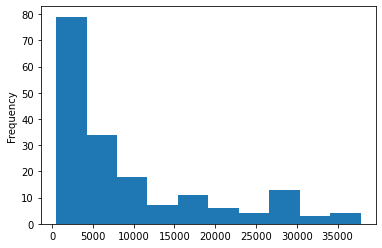

In [45]:
data_countries_analisis["GDP ($ per capita)"].plot.hist()

Vemos que la media de todos los paises esta muy por debajo de la media del pais que tiene más GDP, incluso el 75% de los paises esta por debajo de 13000 que es aproximadamente un tercio de lo que tiene el máximo. El 50% esta muy por debajo de la media mundial lo que indica que pocos paises llegan a tener más de la media mundial de GDP.

In [46]:
data_countries_analisis["Literacy (%)"].describe(include='all')

count    179.000000
mean      81.944134
std       19.837537
min       17.600000
25%       69.950000
50%       90.900000
75%       97.800000
max      100.000000
Name: Literacy (%), dtype: float64

<AxesSubplot:ylabel='Frequency'>

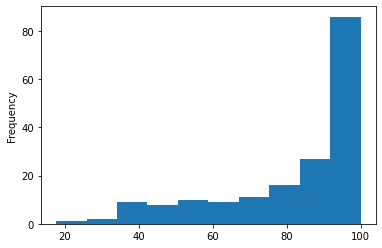

In [47]:
data_countries_analisis["Literacy (%)"].plot.hist()

En este caso "Literacy" representa el porcentaje de personas que no son analfabetas. Podemos ver que la media es más del 80% dando lugar a que la mayoría de la gente es alfabeta. El mínimo nos hace ver que hay paises muy desfavorecidos en los que la mayoría son analfabetos concretamente solo un 17% no lo son. 

Los percentiles nos muestran que la mayoria tiene un nivel muy bajo de analfabetismo. El 50% de los paises esta por encima del 90% y solo hay un 25% por debajo del 70%.

In [48]:
data_countries_analisis["Phones (per 1000)"].describe(include='all')

count    179.000000
mean     208.151955
std      210.121875
min        0.200000
25%       27.100000
50%      137.100000
75%      335.000000
max      898.000000
Name: Phones (per 1000), dtype: float64

<AxesSubplot:ylabel='Frequency'>

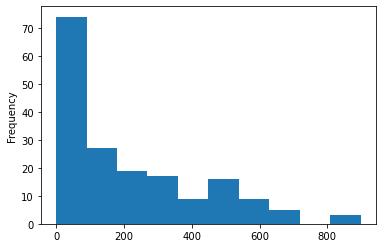

In [49]:
data_countries_analisis["Phones (per 1000)"].plot.hist()

Esta variable nos muestra el numero de moviles por 1000 habitantes de cada país. Vemos que la media esta muy por debajo de los 1000 y su desviacion típica varia +-200 aproximadamente lo que nos indica que no es común tener casi 1 movil por persona. 

El máximo esta muy lejos del percentil 75% que nos hace ver que hay paises privilegiados muy por encima de la media y de los percentiles. El 50% de los paises tienen menos de 137 moviles cada 1000 habitantes que esta muy lejos del máximo.

In [50]:
data_countries_analisis["Agriculture"].describe(include='all')

count    179.000000
mean       0.156905
std        0.151343
min        0.000000
25%        0.039000
50%        0.101000
75%        0.233000
max        0.769000
Name: Agriculture, dtype: float64

<AxesSubplot:ylabel='Frequency'>

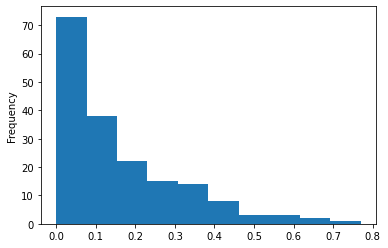

In [51]:
data_countries_analisis["Agriculture"].plot.hist()

Esta variable suponemos que será el porcentaje de la economía que se basa en la agricultura. Vemos que la media es muy baja, en torno a un 15%. Esto y los percentiles nos muestra que hay muy pocos paises que basen su economía en la agricultura. El 75% de los paises, esta por debajo del 23% de economía basada en la agricultura.

In [52]:
data_countries_analisis["Industry"].describe(include='all')

count    179.000000
mean       0.288028
std        0.140310
min        0.032000
25%        0.197000
50%        0.274000
75%        0.349000
max        0.906000
Name: Industry, dtype: float64

<AxesSubplot:ylabel='Frequency'>

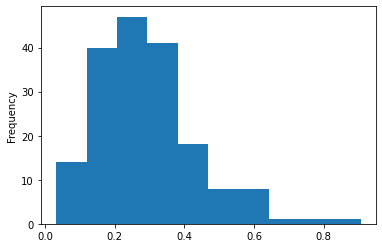

In [53]:
data_countries_analisis["Industry"].plot.hist()

Esta variable la suponemos como el porcentaje de la economía basada en la industria. Podemos ver que la media es un porcentaje relativamente bajo y junto con los percentiles podemos ver que la mayoria tiene un pocentaje por debajo de 35% de la economía basada en la industria.

In [54]:
data_countries_analisis["Service"].describe(include='all')

count    179.000000
mean       0.554508
std        0.165670
min        0.062000
25%        0.424500
50%        0.559000
75%        0.668500
max        0.954000
Name: Service, dtype: float64

<AxesSubplot:ylabel='Frequency'>

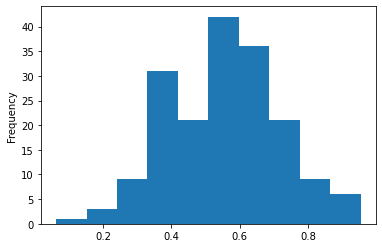

In [55]:
data_countries_analisis["Service"].plot.hist()

Esta variable suponemos que es el porcentaje de la economía que se basa en los servicios. Vemos que la media, junto con los percentiles de esta variable, es mucho mayor que en las dos anteriores de industria y agricultura.

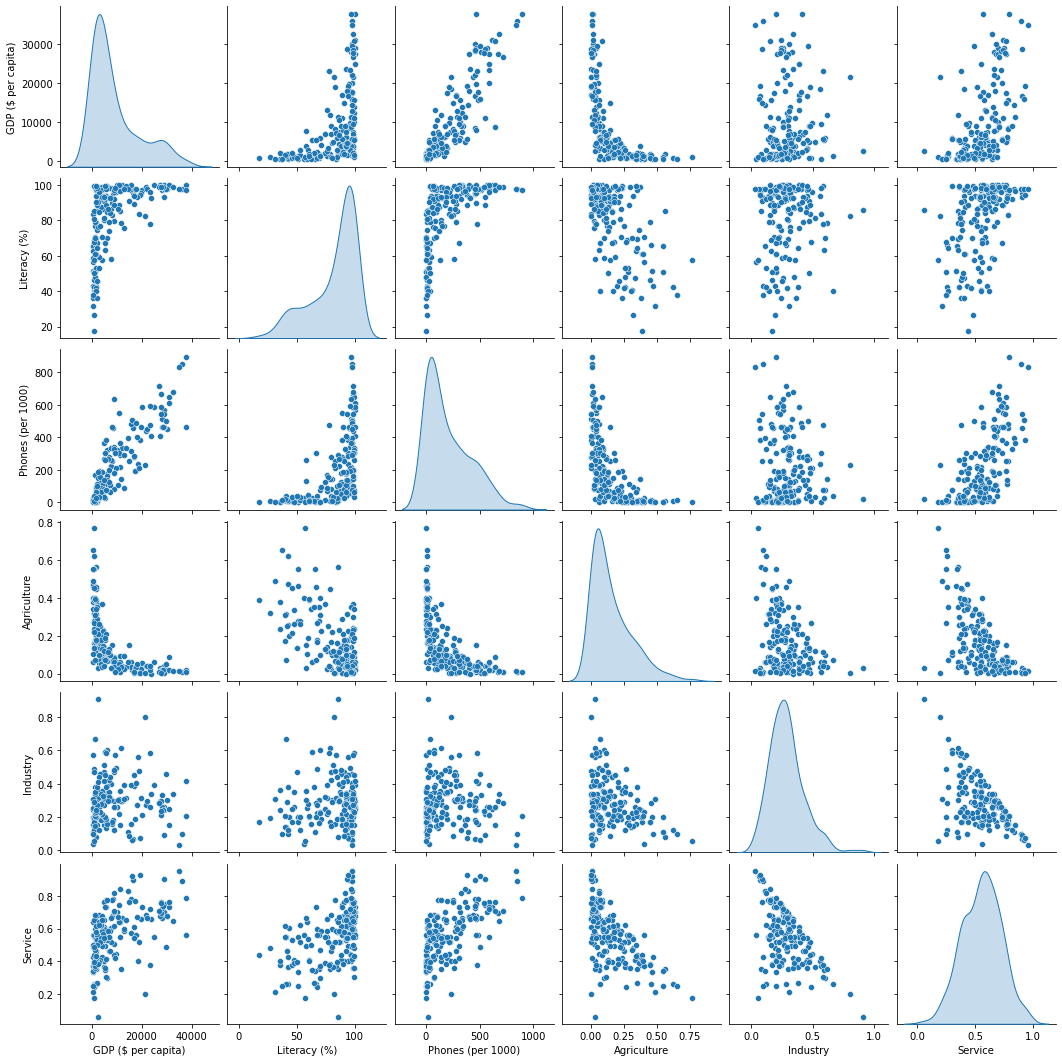

In [56]:
#Diagramas de dispersión
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

sns.pairplot(data_countries_analisis, diag_kind='kde')

Entre las comparaciones más destacadas estan la relación entre el GDP y el analfabetismo. El GDP sube drásticamente en algunos paises cuando el analfabetismo tiende a ser cercano a 0 es decir "Literacy" cerca del 100%. Otros con el 100% de "Literacy" o cerca, tienen el GDP muy bajo. Aun así hay una correlación entre el GDP y el analfabetismo. No hay paises con mayoría analfabeta que tengan un GDP alto.

El número de móviles por 1000 aumenta linealmente según el GDP. Vemos que todos los que tienen un GDP muy bajo, tienen muy pocos móviles por 1000 habitantes, motivo evidente ya que no se lo pueden permitir.

Vemos que el GDP desciende según el porcentaje que tengan de la economía en la agricultura. Los paises que más dependen de la agricultura son los que menos GDP tienen de forma general.

La cosa cambia cuando los paises tiene su economia basada en la industria o en los servicios. Estos gráficos son más dispersos y nos muestran que tener diferentes porcentajes de la economía basados en la industria o servicios no significa tener más o menos GDP.

Otras gráficas interesantes son el analfabetismo y el número de moviles por 1000 habitantes. Esto parece obvio ya que si no sabes ni leer ni escribir, no puedes utilizar bien un móvil, con lo que es evidente que haya poca gente analfabeta con un móvil.

Tambien resulta curioso la relación del porcentaje de la economía en la agricultura con el número de móviles. El número de móviles por 1000 habitantes desciende en cuanto la economía en base a la agricultura empieza a aumentar. Esto también puede estar correlacionado con la relación entre el GDP y el porcentaje de la economía basado en la agricultura.

La economía basada en industria, agricultura se distribuye uniformemente, es decir, cuanto más tienes de una de ellas menos de la otra y viceversa, ya que es una proporción y la suma tiene que dar 1.

La economía basada en servicios está distribuida un poco mejor en relación con el GDP, es decir, si la economía de un país tiene alto el porcentaje de la economía basado en los servicios, es más probable que tenga más GDP. Fijándonos en la media de los porcentajes para todos los paises, vemos que es bastante más alta que en la industria y la agricultura, lo que nos indica que más paises han optado por basar su economía en los servicios antes que en la agricultura o industria. Esto puede ser debido a que otorga algo más de GDP.

In [57]:
#Coeficientes de correlación
data_countries_analisis.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


Para comparar los datos anteriores, vemos estos coeficientes de correlación entre todas las variables. 

Vemos que el GDP esta muy relacionado con el alfabetismo y la industria basada en el servicio pero sobretodo con el número de móviles por 1000 habitantes. Esta relacionado también con la industria pero algo menos que con los demás. Con la agricultura es una correlacion negativa, es decir que cuanto más porcentaje de economía basada en la agricultura, menos GDP, algo que ya habíamos observado antes en los diagramas de dispersión.

Los coeficientes de correlación de el alfabetismo, son similares a los del GDP, pero esta un poco menos correlacionado con el número de móviles por 1000 habitantes y con el porcentaje de economía basado en la industria.

Para el número de móviles por 1000 habitantes, tiene algo de correlación negativa con la industria y algo más de correlación con el porcentaje de industria en la economía.

La agricultura esta relacionada negativamente con las demás variables. Cuanto más porcentaje de agricultura menos de las demás variables.

En la industria destaca la correlacion negativa con el servicio lo que nos indica que cuanto más porcentaje en industria, el porcentaje en servicio disminuye considerablemente. Nos enseña que los paises basan la economía mucho más en una de las dos.

Lo mismo para el servicio.

Estos datos nos confirman el análisis anterior de los diagramas de dispersión.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

--------------------------------------------------------------------------------------------------------------------
Es necesario reescalar los datos ya que algunas variables tienen valores muy diferentes, por ejemplo los porcentajes de las economías basadas en servicios, industria o agricultura en escala decimal comparado con el numero de móviles por 1000 habitantes o más aun con el GDP en escala de miles.

Estos datos no estan normalizados y por eso es mejor reescalarlos en vez de estandarizarlos. Esto lo hacemos con MinMaxScaler.

In [58]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data2 = data_countries_analisis.copy()

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
# StandardScaler cambia la distribución para que estén centrados en 0 y tengan varianza 1 (como una normal). 

scaler = MinMaxScaler()
scaler.fit(data2)
S2_scaled = scaler.transform(data2)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [60]:
RANDOM_STATE=333

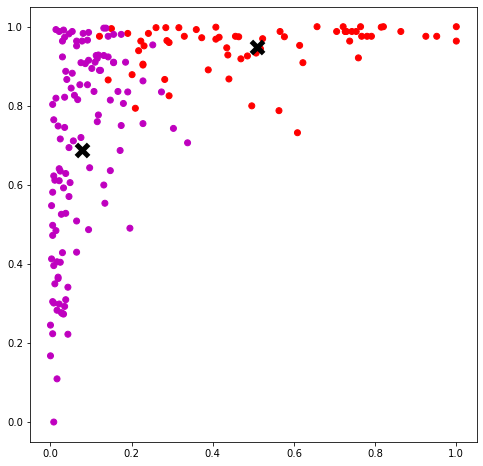

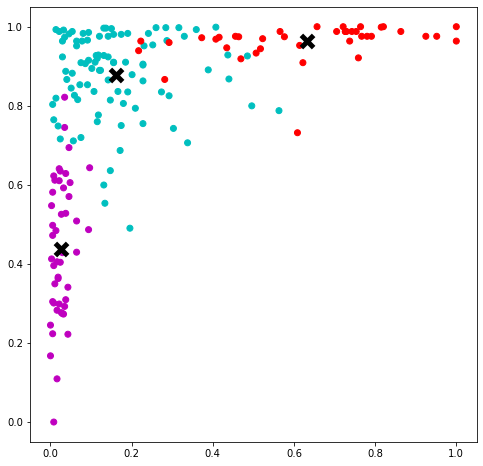

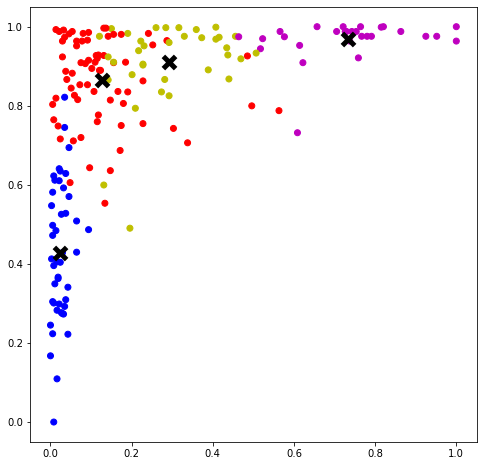

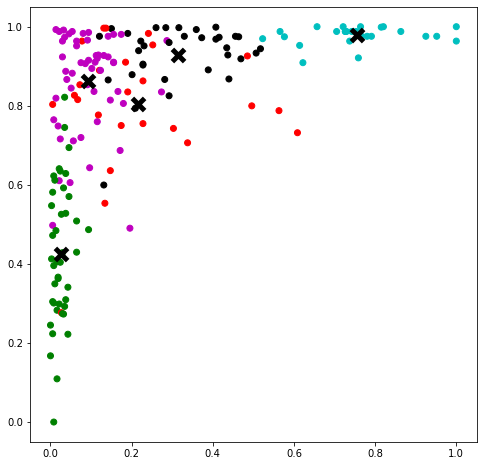

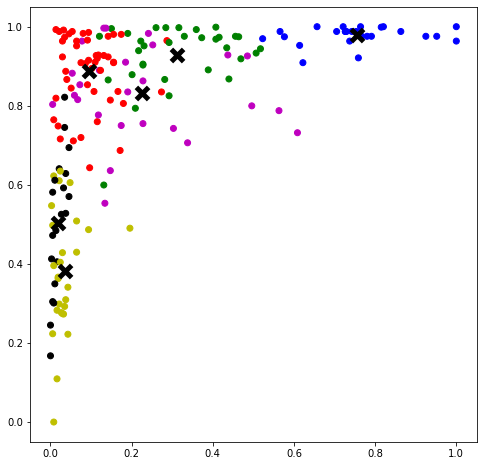

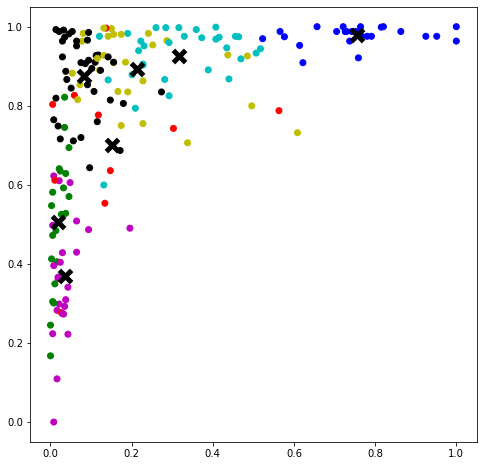

In [61]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 8
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(S2_scaled)
    plot_clusters(S2_scaled, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(S2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(S2_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(S2_scaled, km.labels_)

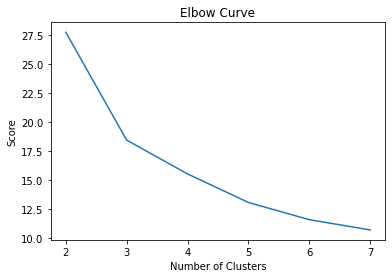

In [62]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

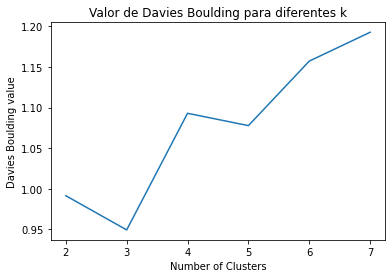

In [63]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

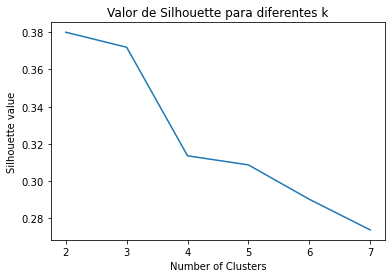

In [64]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

En este el mejor número de clusters para el algoritmo k-Means es 3 ya que en el diagrama del codo y en el valor de Davies Boulding, los mejores valores para el numero de clusters esta en el 3. El valor de Silhouette es mejor para 2 pero la diferencia con el 3 es mucho menor que en el diagrama del codo y en Davies Boulding, con lo que la mejor opción segun nuestros criterios en este caso es utilizar 3 clusters.

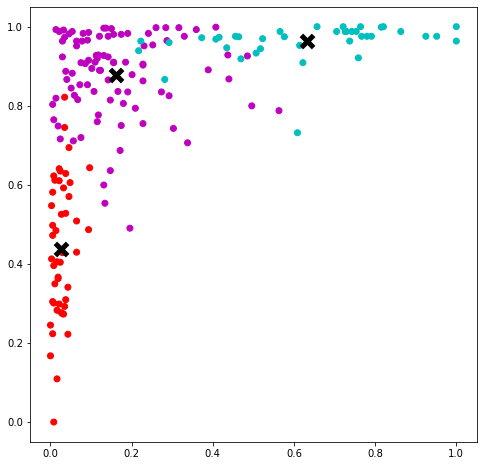

In [68]:
km = KMeans(init='random', n_clusters=3)
km.fit(S2_scaled)
plot_clusters(S2_scaled, km.labels_, km.cluster_centers_)

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

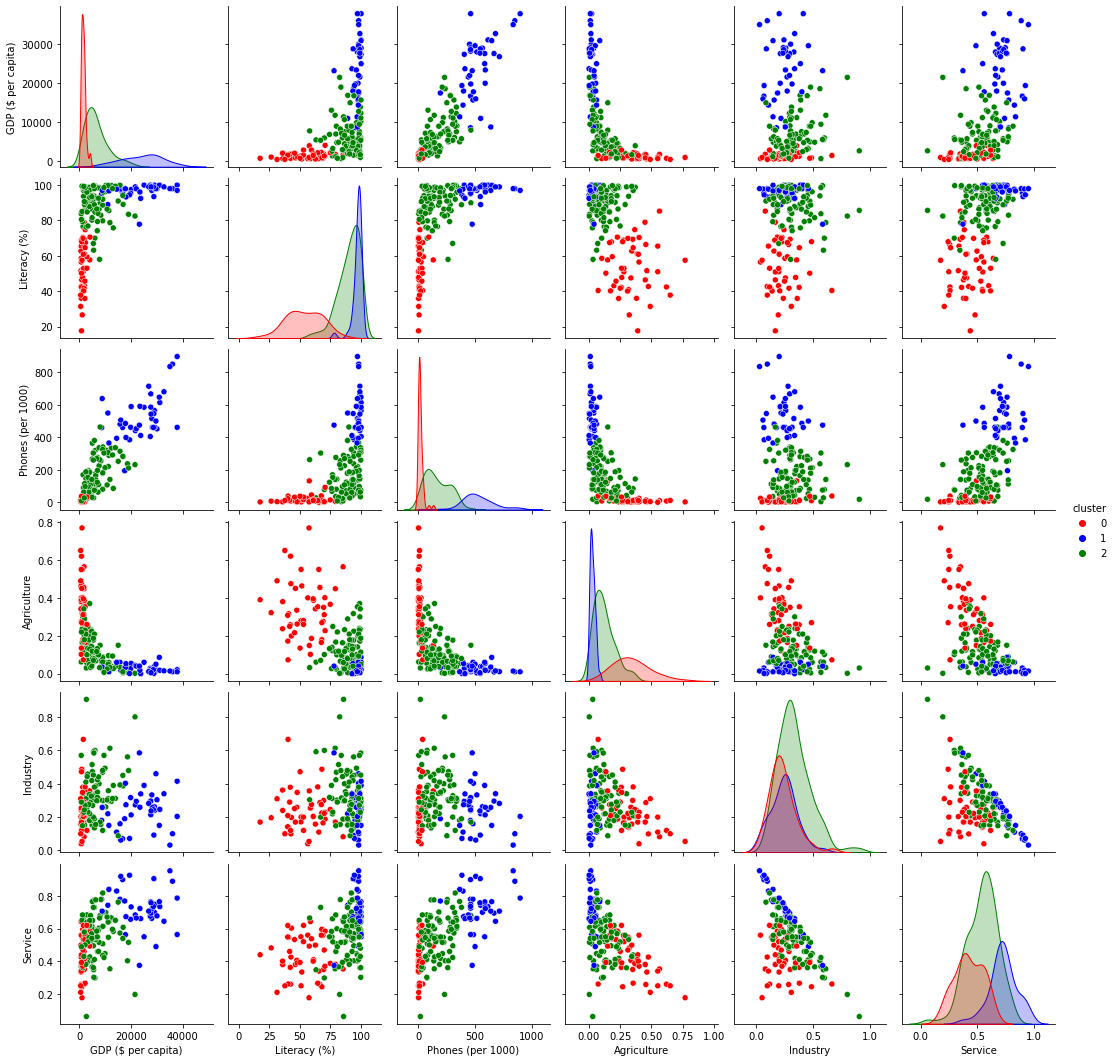

In [87]:
data_cluster_analisis = data_countries_analisis.copy()

data_cluster_analisis['cluster'] = km.labels_

dic_colors = { 0: 'red', 1: 'blue', 2: 'green' }
colors = data_cluster_analisis['cluster'].map(dic_colors)


sns.pairplot(data_cluster_analisis, diag_kind='kde', hue='cluster', palette=dic_colors)

Con los datos del algoritmo k-Means y usando el diagrama de dispersión por pares, se pueden diferenciar de manera clara los tres clusters en practicamente todas las variables. El rojo representa los que menos GDP tienen. El verde los que tienen un GDP medio. Por último, el azul representa a aquellos paises que más GDP tienen.

Vemos que la comparación de pares entre 'Literacy' y 'GDP' esta claramente diferenciada. 
Con el color rojo vemos el cluster que más analfabetismo tiene y con ello, menos GDP. 
Con el color verde vemos el cluster intermedio en el que vemos que segun el analfabetismo va acercandose a cero o lo que es lo mismo, que practicamente todas las personas de un pais saben leer y escribir, el GDP aumenta de forma general.
Con el color azul vemos el ultimo cluster que representa a los paises que más GDP tiene y todos ellos con un nivel de alfabetismo practicamente total.
De esto podemos sacar como conclusiones que el saber leer y escribir, como es de forma evidente, hace que aumente el GDP de un país.

Otra comparación bastante clara entre pares es el GDP con el número de móviles por 1000 habitantes. Vemos que el número de móviles aumenta linealmente con el aumento de GDP y con los clusters más o menos bien diferenciados. 
El rojo, con un GDP muy bajo, tienen un número muy bajo de móviles por 1000 habitantes.
El verde, con un GDP más alto, es el grupo que tiene un número de moviles intermedio y que se encuentra cerca de la media.
El azul, con el GDP más alto, es el grupo que más moviles por 1000 habitantes tiene. Este grupo esta un poco más disperso pero en general aumenta de forma lineal.

Cómo hemos visto antes, la agricultura esta diferenciada en los 3 clusters claramente. 
El cluster azul no tiene prácticamente nada de porcentaje de su economía basada en la agricultura.
El cluster verde no tiene un gran porcentaje en la agricultura pero segun va bajando el GDP, la proporción va subiendo.
El cluster rojo muestra un aumento considerable en el porcentaje de la agricultura.

Otro par de variables en el que se diferencian bastante los 3 clusters es en el número de móviles por 1000 habitantes y el alfabetismo. Los tres clusters se diferencian claramente.

Los clusters en los pares relacionando industria y servicio con los demás, no son tan claros de diferenciar ya que estan todos los diferentes clusters bastante juntos.  
Esto también se puede ver en las gráficas relacionando industria y servicios con ellos mismos. Los tres clusters tiene una altura y anchura similares.
